In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

In [3]:
df=pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

In [4]:
print(df.head())

  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2             

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            5000 non-null   object
 12  Access

In [6]:
print(df.describe())

               Age  Years_of_Experience  Hours_Worked_Per_Week  \
count  5000.000000          5000.000000            5000.000000   
mean     40.995000            17.810200              39.614600   
std      11.296021            10.020412              11.860194   
min      22.000000             1.000000              20.000000   
25%      31.000000             9.000000              29.000000   
50%      41.000000            18.000000              40.000000   
75%      51.000000            26.000000              50.000000   
max      60.000000            35.000000              60.000000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                 5000.000000               5000.000000   
mean                     7.559000                  2.984200   
std                      4.636121                  1.410513   
min                      0.000000                  1.000000   
25%                      4.000000                  2.000000   
50%                      8.

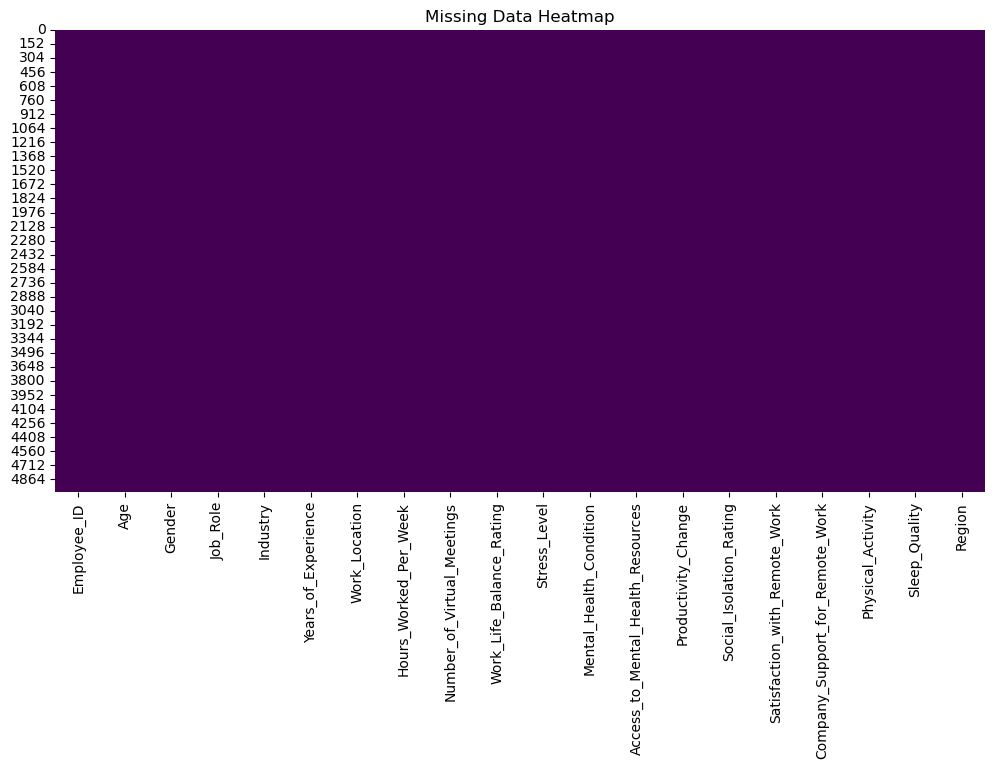

In [7]:
missing_values = df.isnull()
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(subset=['Job_Role'], inplace=True)

In [9]:
categorical_cols = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Mental_Health_Condition', 'Satisfaction_with_Remote_Work']
df[categorical_cols] = df[categorical_cols].astype('category')

In [10]:
print(df.dtypes)

Employee_ID                            object
Age                                     int64
Gender                               category
Job_Role                             category
Industry                             category
Years_of_Experience                     int64
Work_Location                        category
Hours_Worked_Per_Week                   int64
Number_of_Virtual_Meetings              int64
Work_Life_Balance_Rating                int64
Stress_Level                           object
Mental_Health_Condition              category
Access_to_Mental_Health_Resources      object
Productivity_Change                    object
Social_Isolation_Rating                 int64
Satisfaction_with_Remote_Work        category
Company_Support_for_Remote_Work         int64
Physical_Activity                      object
Sleep_Quality                          object
Region                                 object
dtype: object


In [11]:
df.to_csv('cleaned_dataset.csv', index=False)

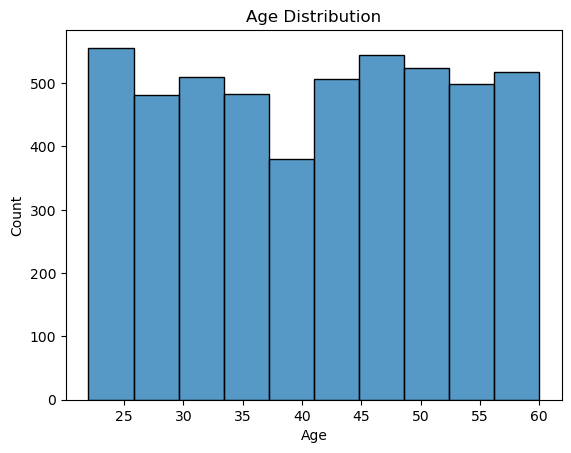

In [91]:
sns.histplot(df['Age'],bins=10)
plt.title('Age Distribution')
plt.show()  
#age in z score normalization

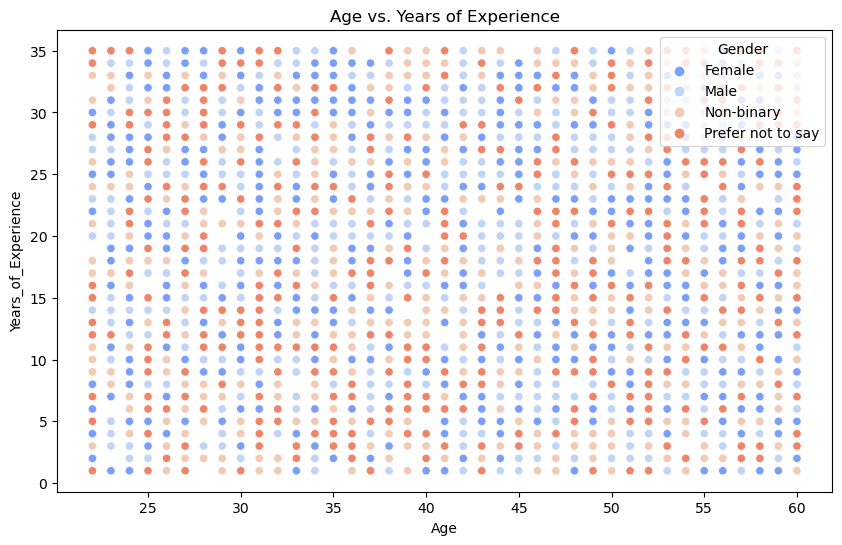

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Years_of_Experience', hue='Gender', palette='coolwarm')
plt.title('Age vs. Years of Experience')
plt.show()

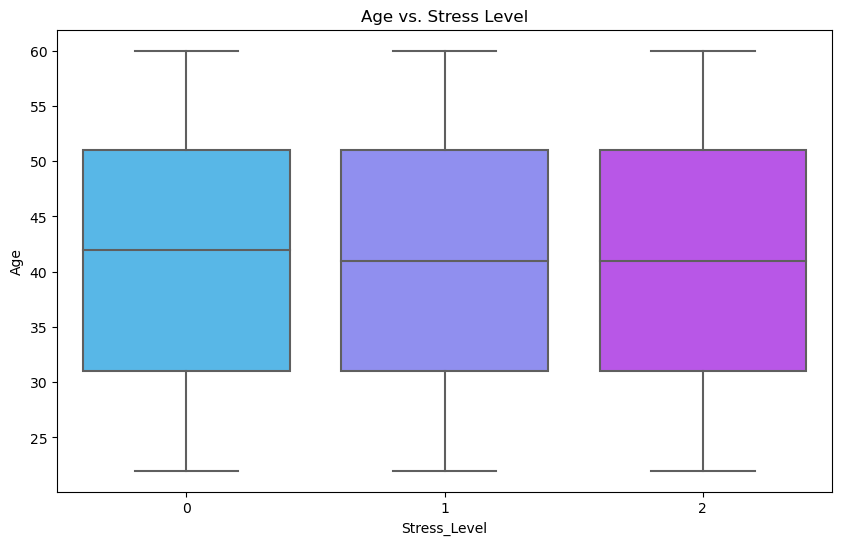

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Age', x='Stress_Level',palette='cool')
plt.title('Age vs. Stress Level')
plt.show()

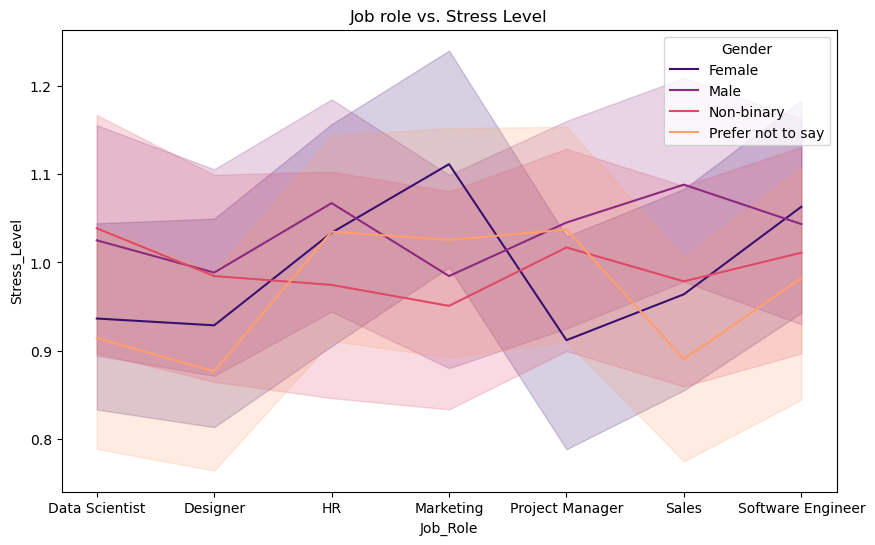

In [50]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Job_Role', y='Stress_Level', hue='Gender', palette='magma')
plt.title('Job role vs. Stress Level')
plt.show()

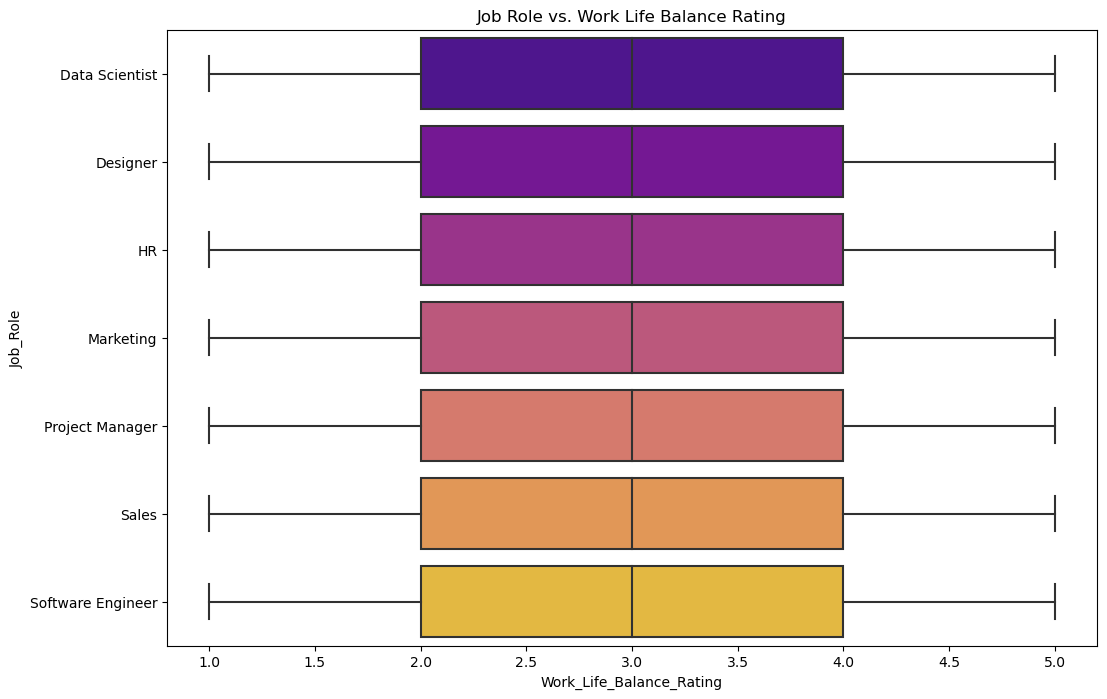

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Work_Life_Balance_Rating', y='Job_Role', palette='plasma')
plt.title('Job Role vs. Work Life Balance Rating')
plt.show()

In [17]:
if df['Stress_Level'].dtype == 'object':
    df['Stress_Level'] = df['Stress_Level'].astype('category').cat.codes

print(df.dtypes)

Employee_ID                            object
Age                                     int64
Gender                               category
Job_Role                             category
Industry                             category
Years_of_Experience                     int64
Work_Location                        category
Hours_Worked_Per_Week                   int64
Number_of_Virtual_Meetings              int64
Work_Life_Balance_Rating                int64
Stress_Level                             int8
Mental_Health_Condition              category
Access_to_Mental_Health_Resources      object
Productivity_Change                    object
Social_Isolation_Rating                 int64
Satisfaction_with_Remote_Work        category
Company_Support_for_Remote_Work         int64
Physical_Activity                      object
Sleep_Quality                          object
Region                                 object
dtype: object


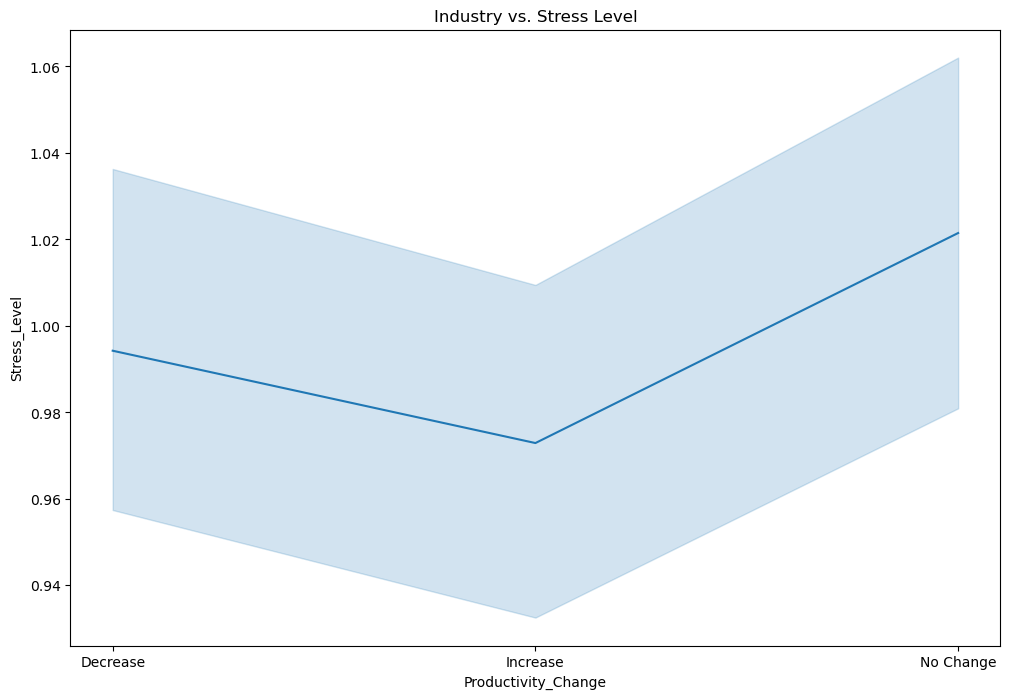

In [18]:

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Productivity_Change', y='Stress_Level', )
plt.title('Industry vs. Stress Level')
plt.show()

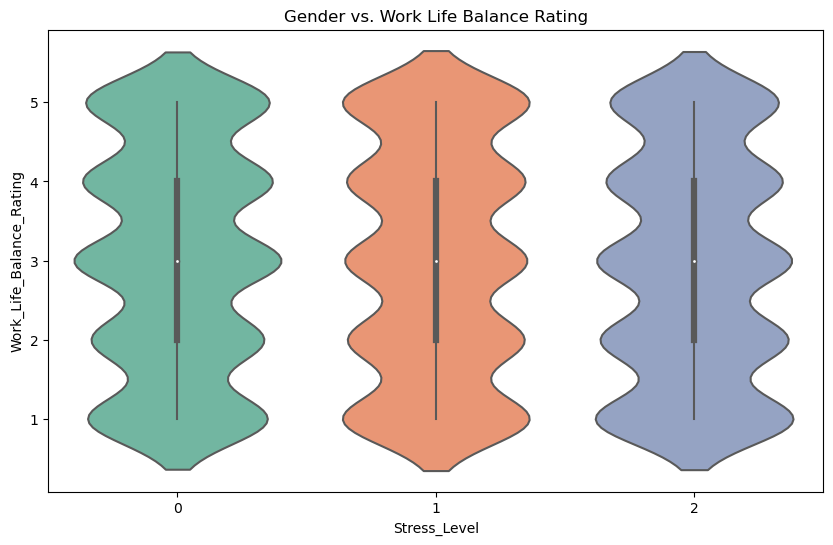

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Stress_Level', y='Work_Life_Balance_Rating', palette='Set2')
plt.title('Gender vs. Work Life Balance Rating')
plt.show()

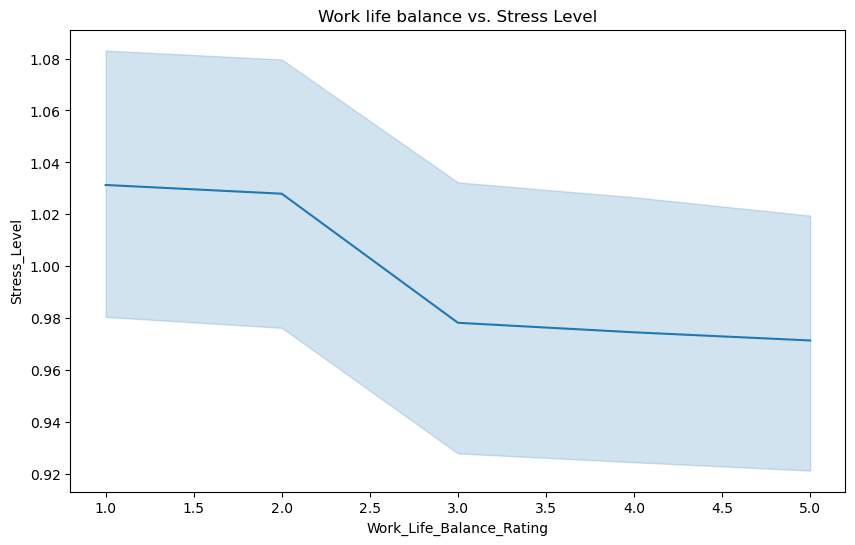

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Work_Life_Balance_Rating', y='Stress_Level' )
plt.title('Work life balance vs. Stress Level')
plt.show()

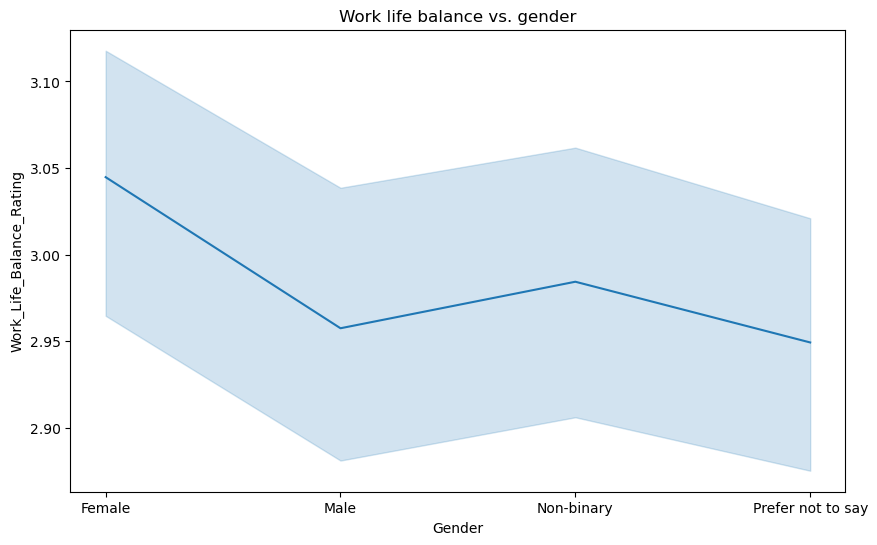

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Gender', y='Work_Life_Balance_Rating')
plt.title('Work life balance vs. gender')
plt.show()

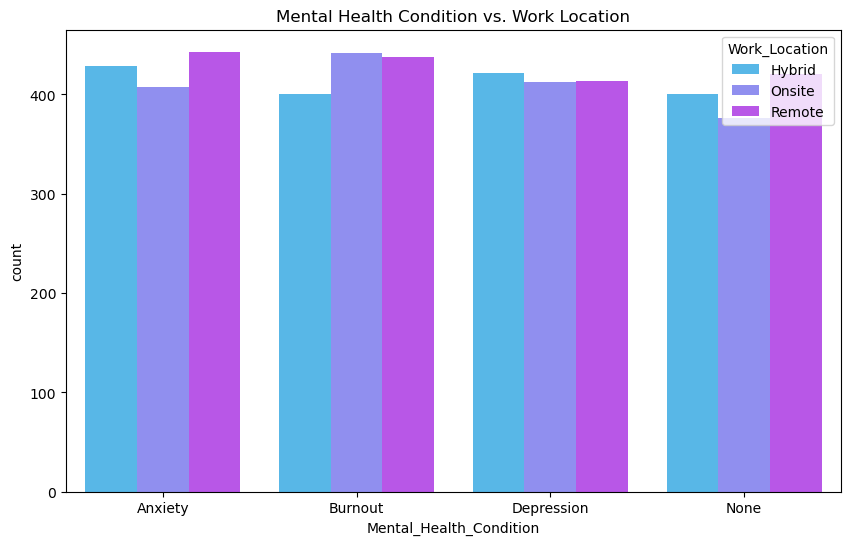

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mental_Health_Condition', hue='Work_Location', palette = 'cool')
plt.title('Mental Health Condition vs. Work Location')
plt.show()

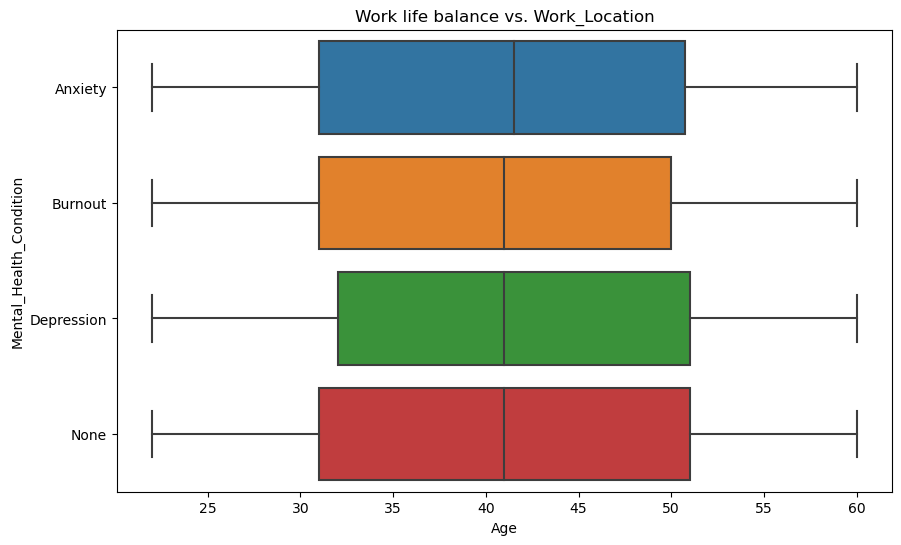

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Mental_Health_Condition', x='Age')
plt.title('Work life balance vs. Work_Location')
plt.show()

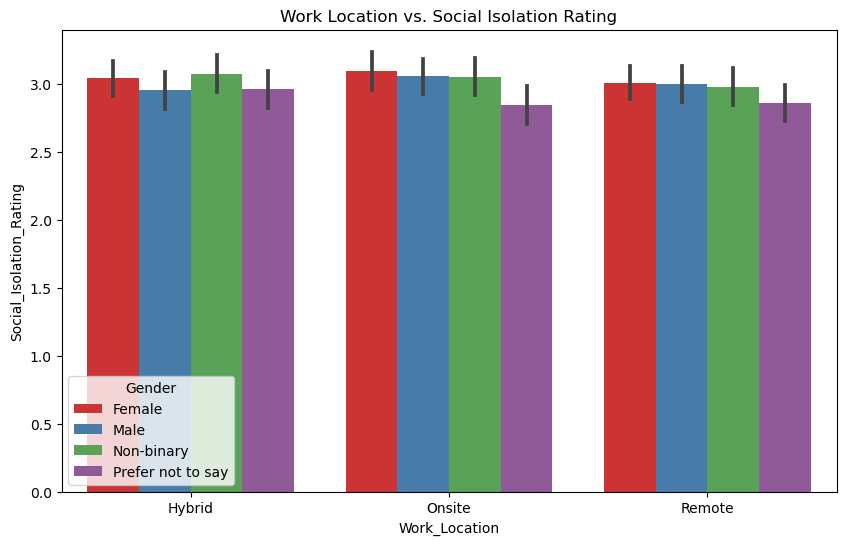

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Work_Location', y='Social_Isolation_Rating', hue='Gender', palette='Set1')
plt.title('Work Location vs. Social Isolation Rating')
plt.show()

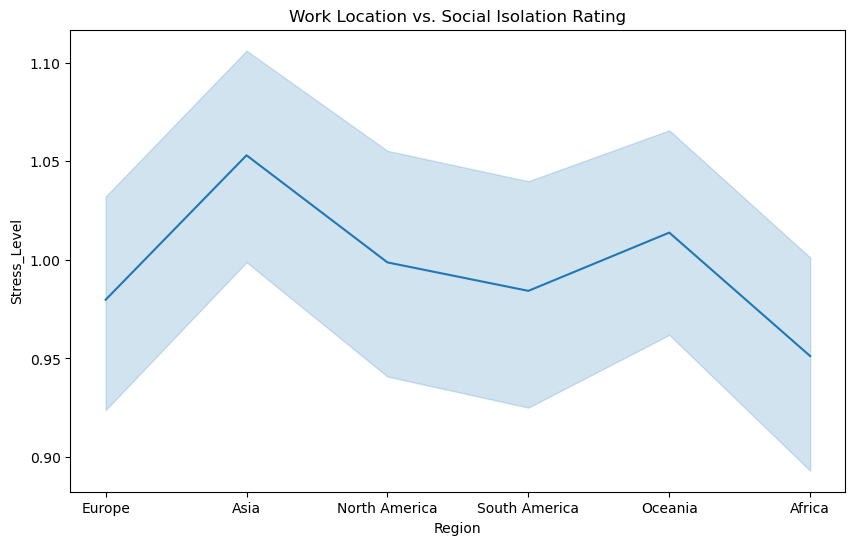

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Region', y='Stress_Level')
plt.title('Work Location vs. Social Isolation Rating')
plt.show()

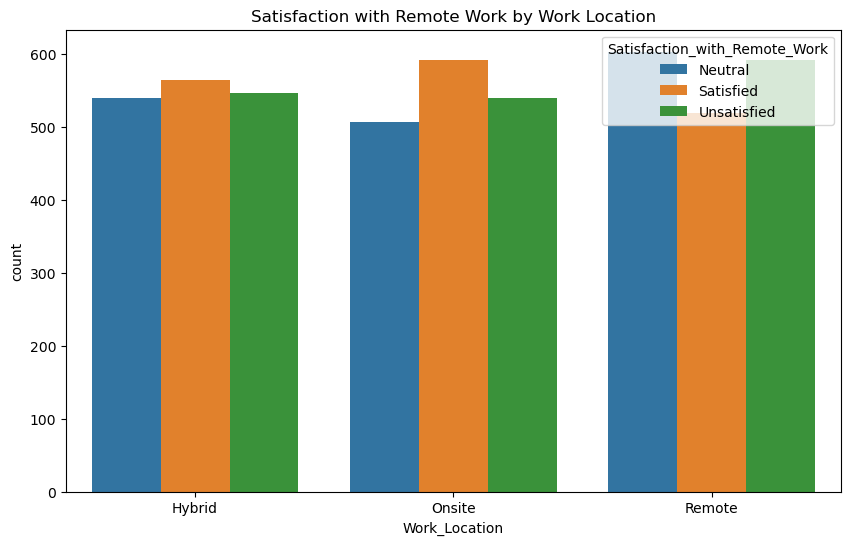

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Satisfaction_with_Remote_Work')
plt.title('Satisfaction with Remote Work by Work Location')
plt.show()

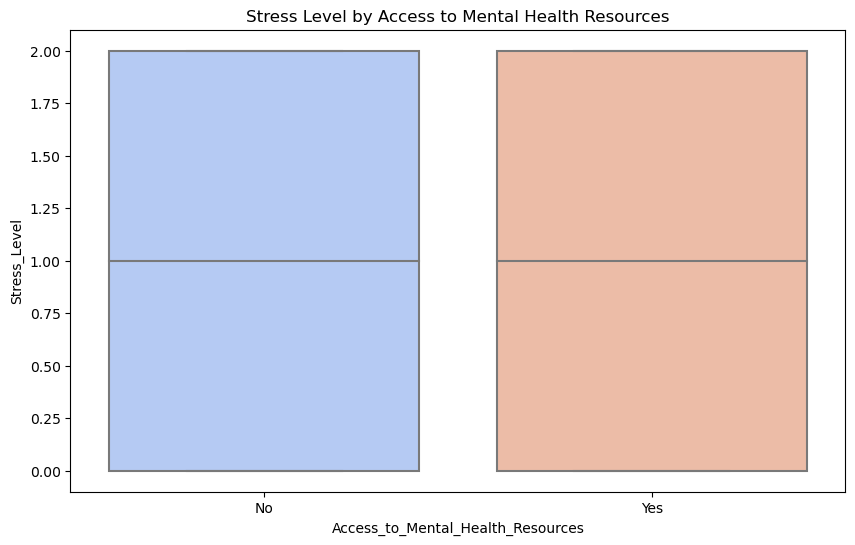

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Access_to_Mental_Health_Resources', y='Stress_Level', palette='coolwarm')
plt.title('Stress Level by Access to Mental Health Resources')
plt.show()

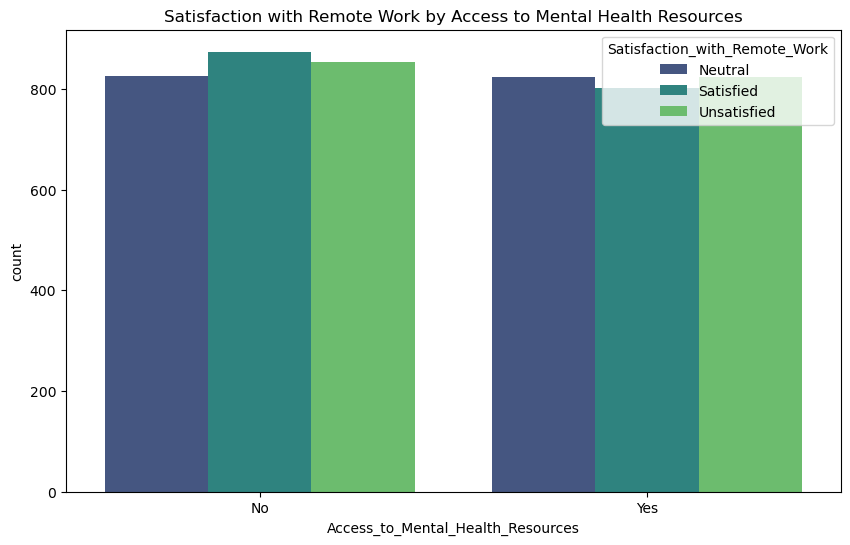

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Access_to_Mental_Health_Resources', hue='Satisfaction_with_Remote_Work', palette='viridis')
plt.title('Satisfaction with Remote Work by Access to Mental Health Resources')
plt.show()

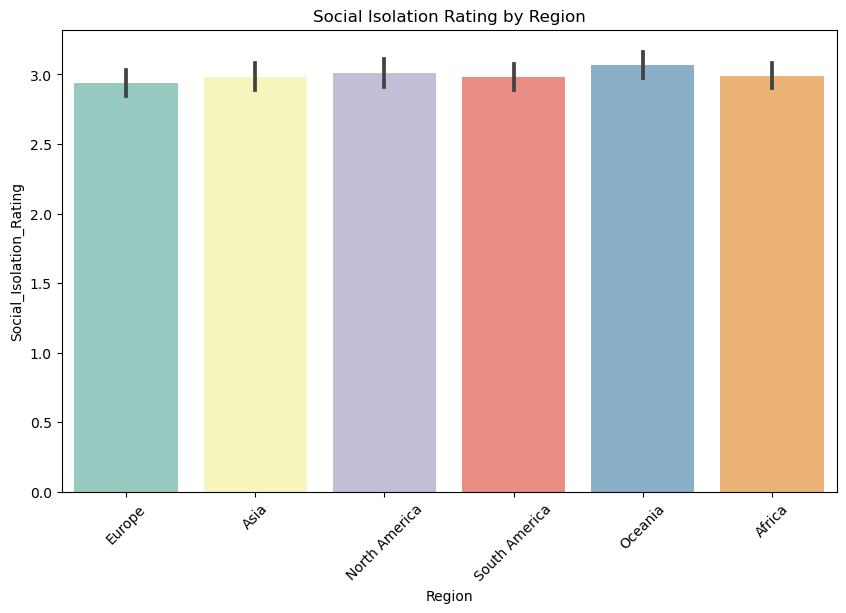

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Social_Isolation_Rating', palette='Set3')
plt.title('Social Isolation Rating by Region')
plt.xticks(rotation=45)
plt.show()

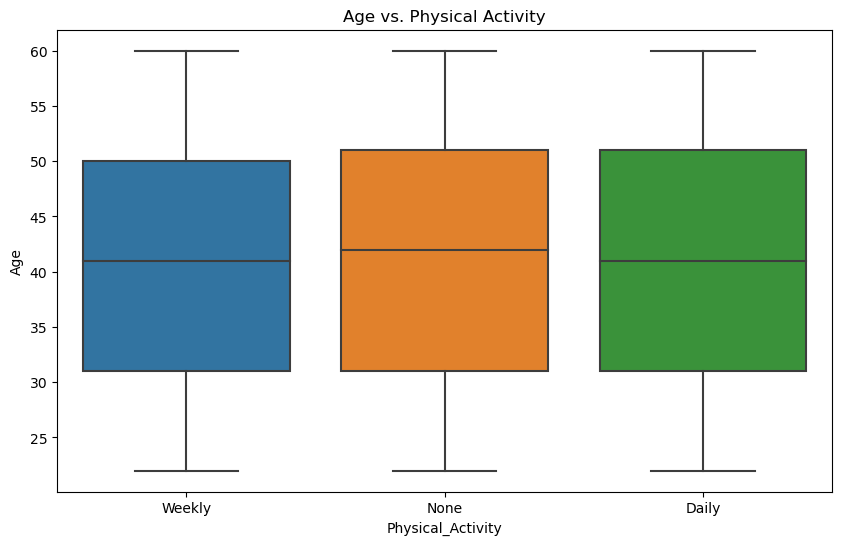

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Physical_Activity', y='Age')
plt.title('Age vs. Physical Activity')
plt.show()

C:\Users\91735\AppData\Local\Temp\ipykernel_22880\1074405906.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='Gender', y='Sleep_Quality', palette='autumn')


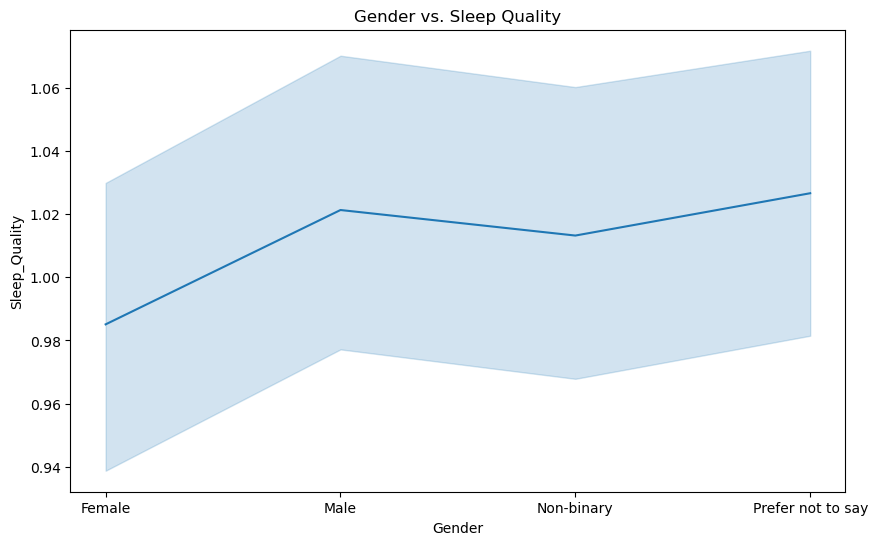

In [79]:
if df['Sleep_Quality'].dtype == 'object':
    df['Sleep_Quality'] = df['Sleep_Quality'].astype('category').cat.codes

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Gender', y='Sleep_Quality', palette='autumn')
plt.title('Gender vs. Sleep Quality')
plt.show()

<Figure size 1200x1200 with 0 Axes>

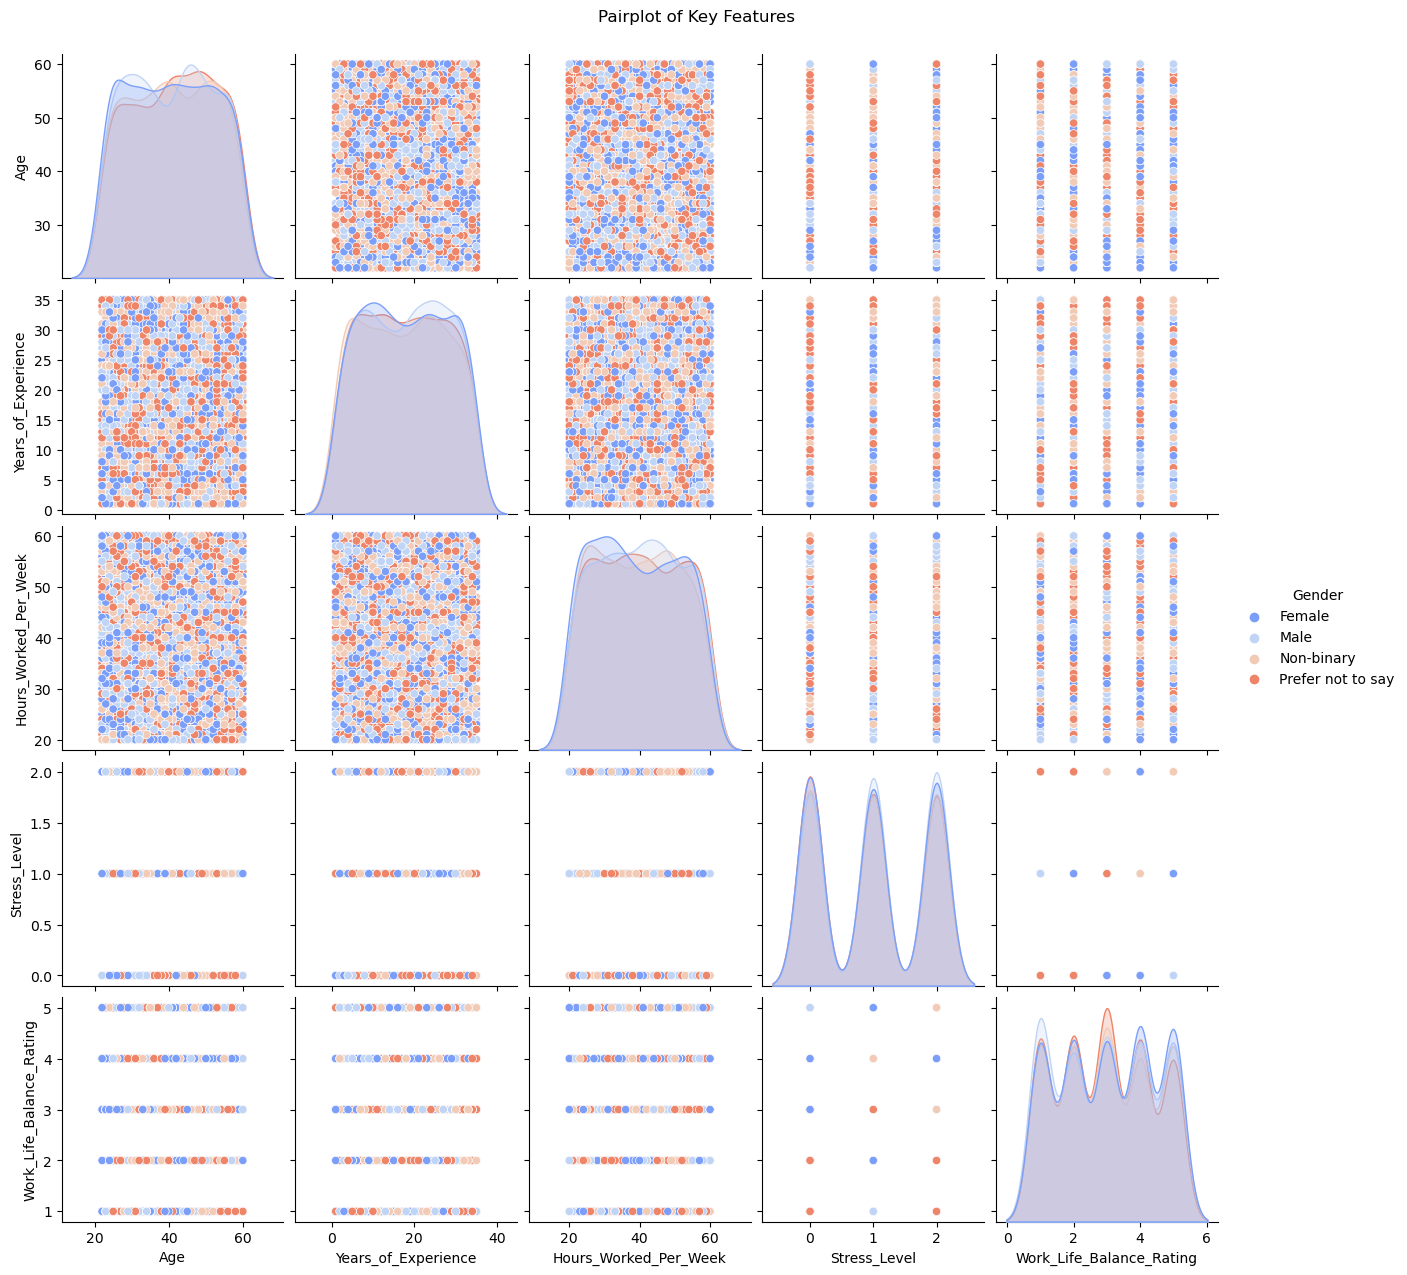

In [33]:
pairplot_columns = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 
                    'Stress_Level', 'Work_Life_Balance_Rating', 'Gender']

plt.figure(figsize=(12, 12))
sns.pairplot(df[pairplot_columns], hue='Gender', palette='coolwarm')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

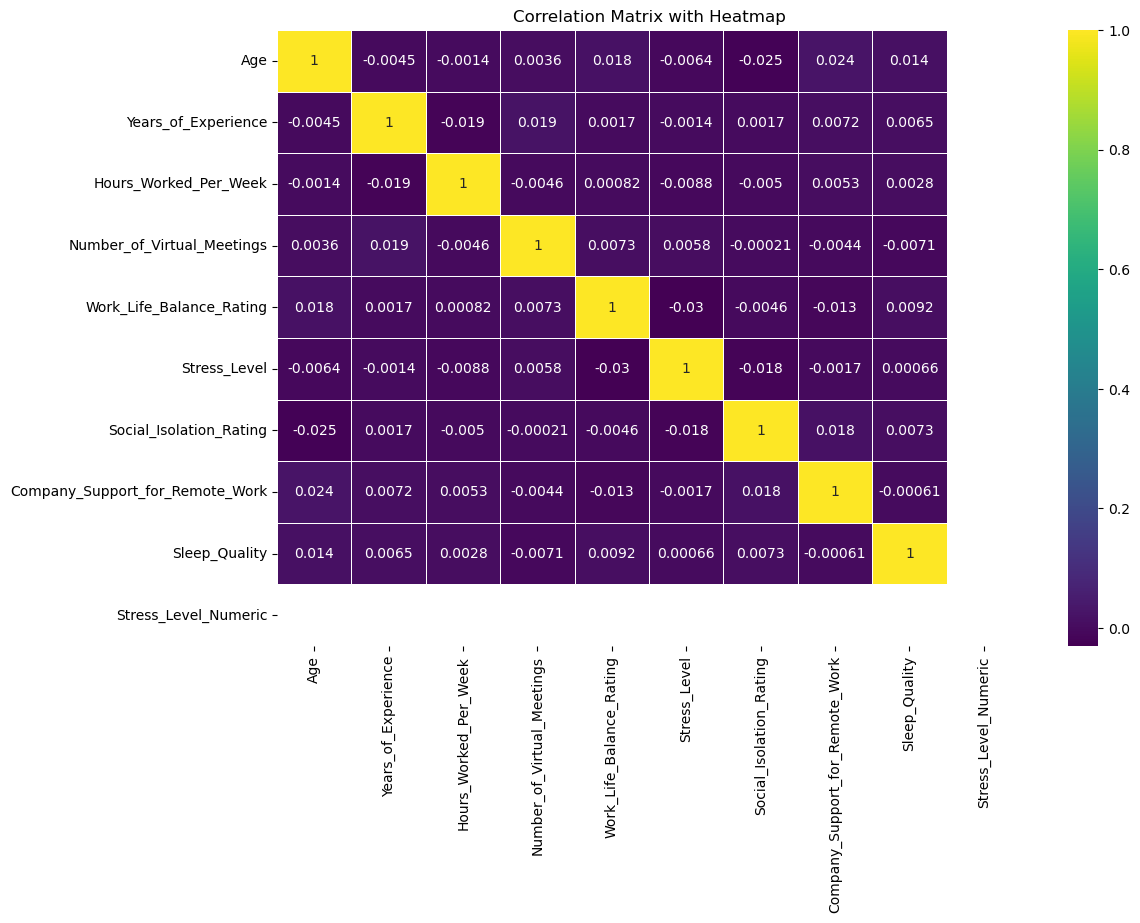

In [83]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)  # Replace 'viridis' with your preferred colormap
plt.title('Correlation Matrix with Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

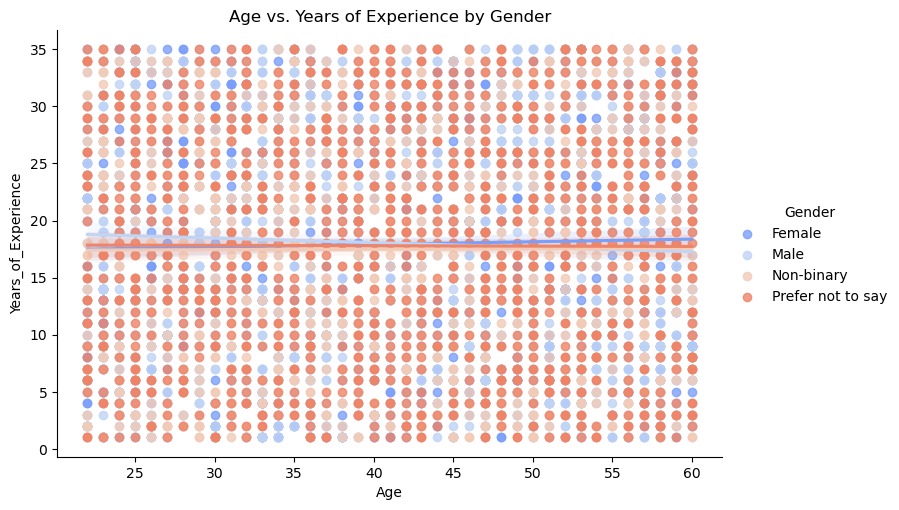

In [86]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Age', y='Years_of_Experience', hue='Gender', palette='coolwarm', aspect=1.5)
plt.title('Age vs. Years of Experience by Gender')
plt.show()

<Figure size 1000x600 with 0 Axes>

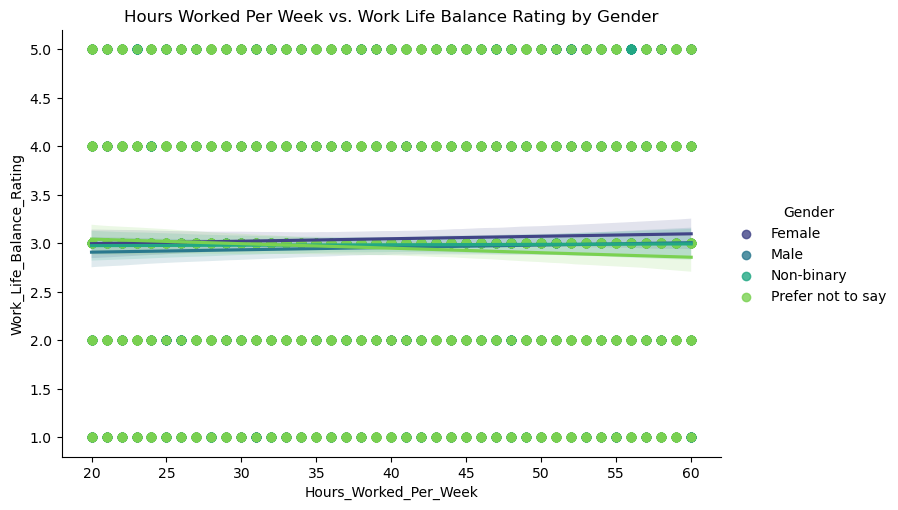

In [88]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Hours_Worked_Per_Week', y='Work_Life_Balance_Rating', hue='Gender', palette='viridis', aspect=1.5)
plt.title('Hours Worked Per Week vs. Work Life Balance Rating by Gender')
plt.show()

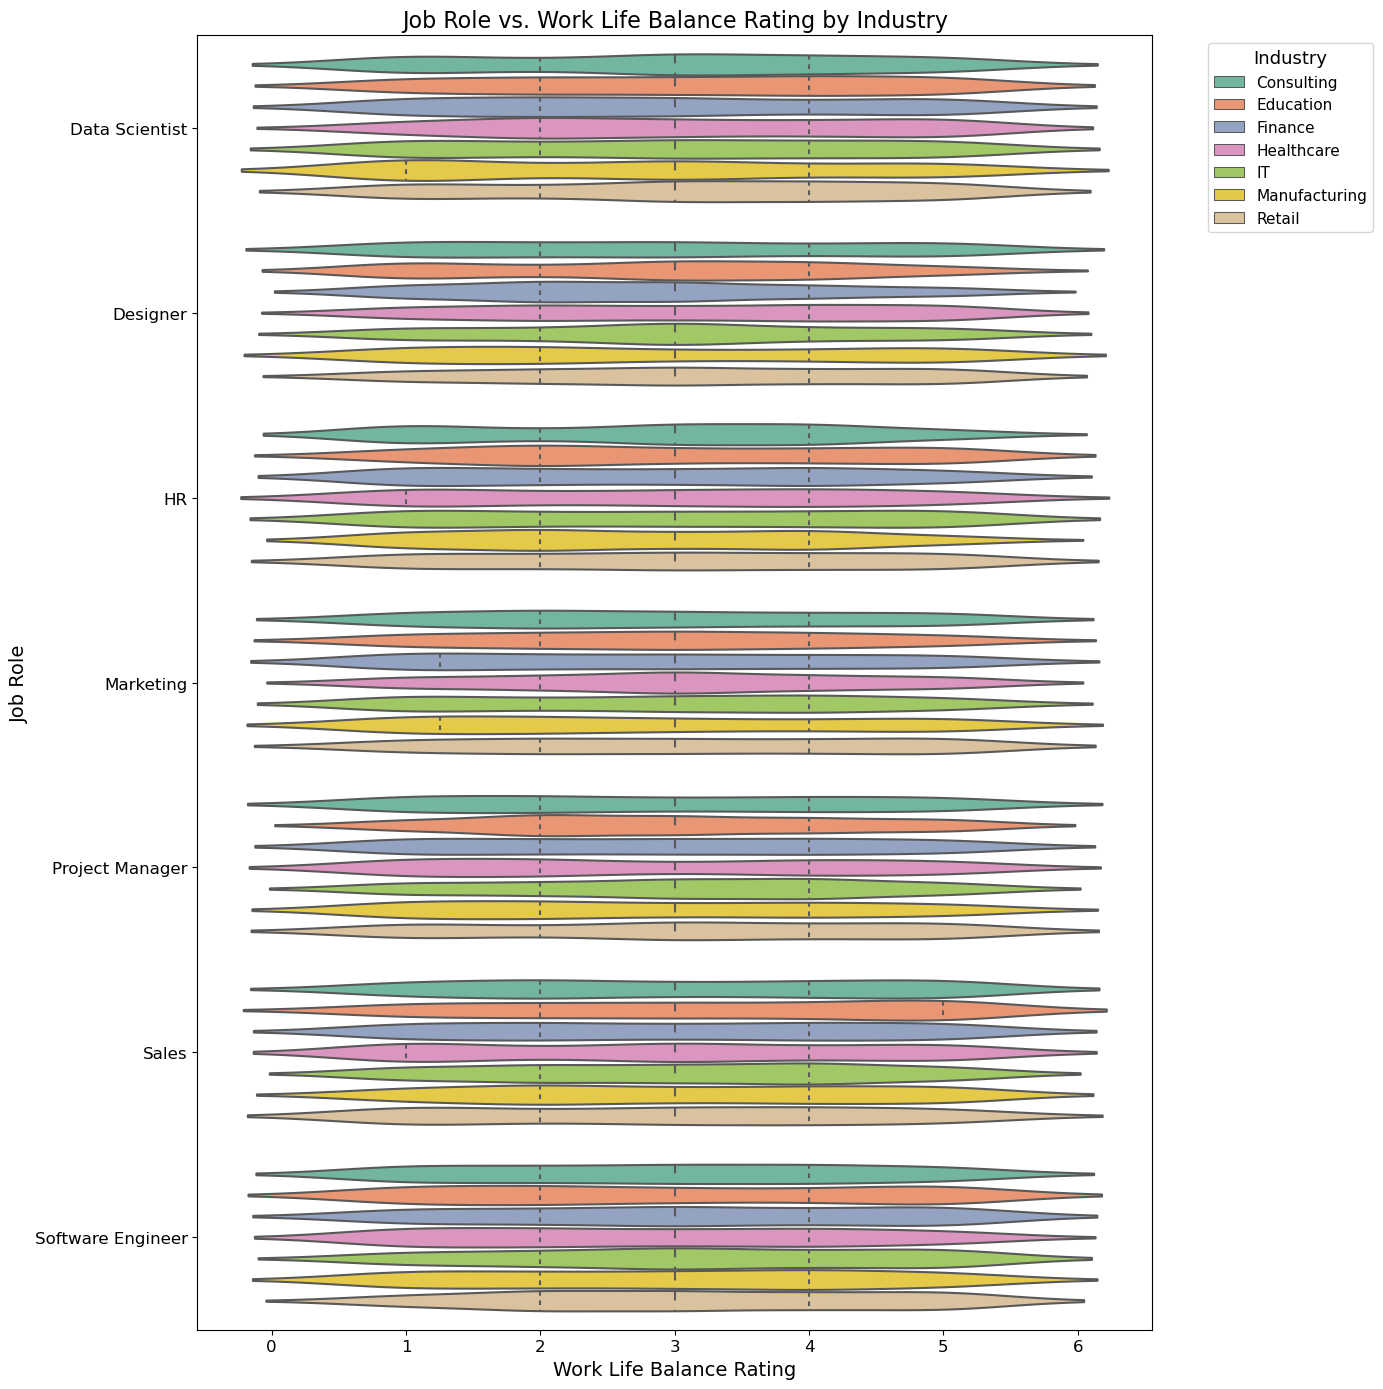

In [37]:
plt.figure(figsize=(14, 14))
sns.violinplot(data=df, x='Work_Life_Balance_Rating', y='Job_Role', hue='Industry', palette='Set2', inner="quartile", dodge=True)
plt.title('Job Role vs. Work Life Balance Rating by Industry', fontsize=16)
plt.xlabel('Work Life Balance Rating', fontsize=14)
plt.ylabel('Job Role', fontsize=14)
plt.legend(title='Industry', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Stress_Level         0    1    2
Job_Role                        
Data Scientist     242  230  224
Designer           252  259  212
HR                 227  241  248
Marketing          225  221  237
Project Manager    253  228  257
Sales              253  241  239
Software Engineer  234  225  252


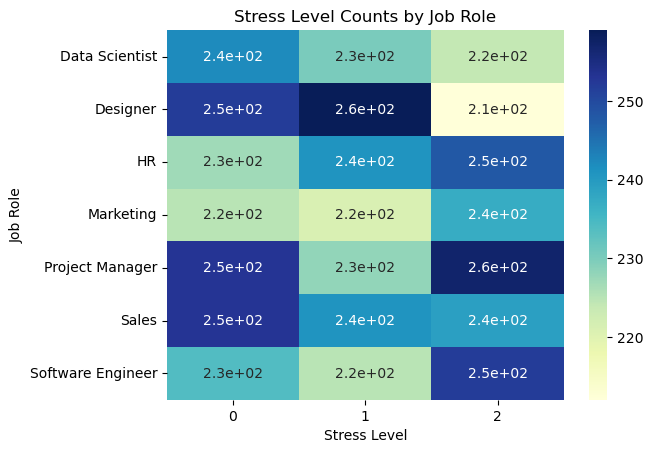

In [38]:
stress_summary = df.groupby('Job_Role')['Stress_Level'].value_counts().unstack().fillna(0)
print(stress_summary)

# Optional: You can also visualize these statistics with a heatmap
sns.heatmap(stress_summary, annot=True, cmap='YlGnBu')
plt.title('Stress Level Counts by Job Role')
plt.ylabel('Job Role')
plt.xlabel('Stress Level')
plt.show()


In [39]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = df.groupby(['Job_Role', 'Stress_Level']).size().unstack(fill_value=0)

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2 Statistic: {chi2}, p-value: {p}')


Chi2 Statistic: 11.203878889845443, p-value: 0.511531827619742


In [40]:
df['Stress_Level'] = df['Stress_Level'].astype('int')

print(df.dtypes)

Employee_ID                            object
Age                                     int64
Gender                               category
Job_Role                             category
Industry                             category
Years_of_Experience                     int64
Work_Location                        category
Hours_Worked_Per_Week                   int64
Number_of_Virtual_Meetings              int64
Work_Life_Balance_Rating                int64
Stress_Level                            int32
Mental_Health_Condition              category
Access_to_Mental_Health_Resources      object
Productivity_Change                    object
Social_Isolation_Rating                 int64
Satisfaction_with_Remote_Work        category
Company_Support_for_Remote_Work         int64
Physical_Activity                      object
Sleep_Quality                            int8
Region                                 object
dtype: object


In [41]:
# Map stress levels to numeric values
stress_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_mapping)


In [42]:
print(df.dtypes)


Employee_ID                            object
Age                                     int64
Gender                               category
Job_Role                             category
Industry                             category
Years_of_Experience                     int64
Work_Location                        category
Hours_Worked_Per_Week                   int64
Number_of_Virtual_Meetings              int64
Work_Life_Balance_Rating                int64
Stress_Level                            int32
Mental_Health_Condition              category
Access_to_Mental_Health_Resources      object
Productivity_Change                    object
Social_Isolation_Rating                 int64
Satisfaction_with_Remote_Work        category
Company_Support_for_Remote_Work         int64
Physical_Activity                      object
Sleep_Quality                            int8
Region                                 object
Stress_Level_Numeric                  float64
dtype: object


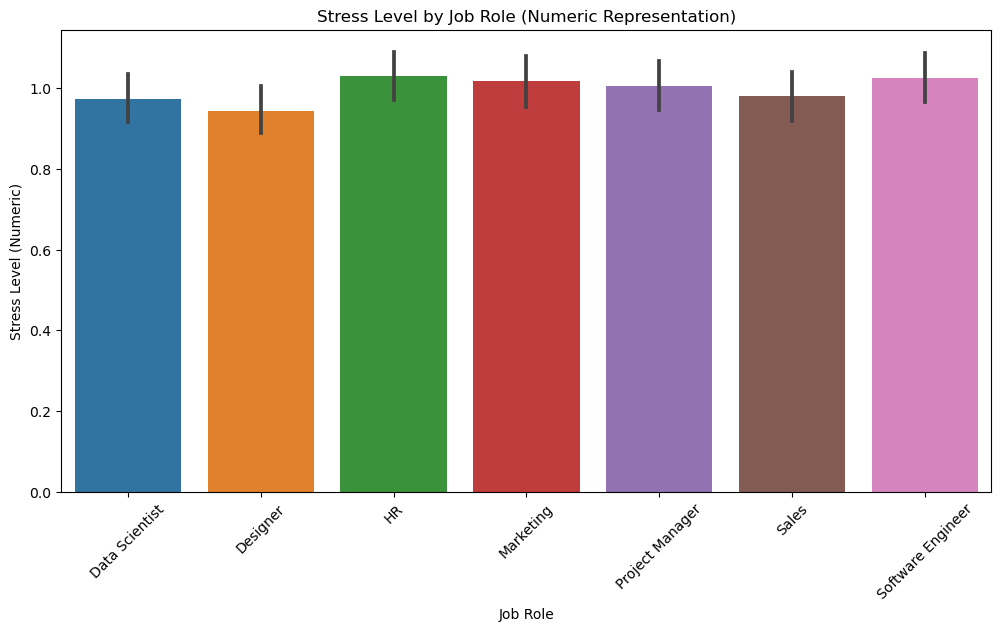

In [89]:

# Boxplot for Stress Level Numeric by Job Role
plt.figure(figsize=(12, 6))
sns.barplot(x='Job_Role', y='Stress_Level', data=df)
plt.title('Stress Level by Job Role (Numeric Representation)')
plt.xticks(rotation=45)
plt.ylabel('Stress Level (Numeric)')
plt.xlabel('Job Role')
plt.show()

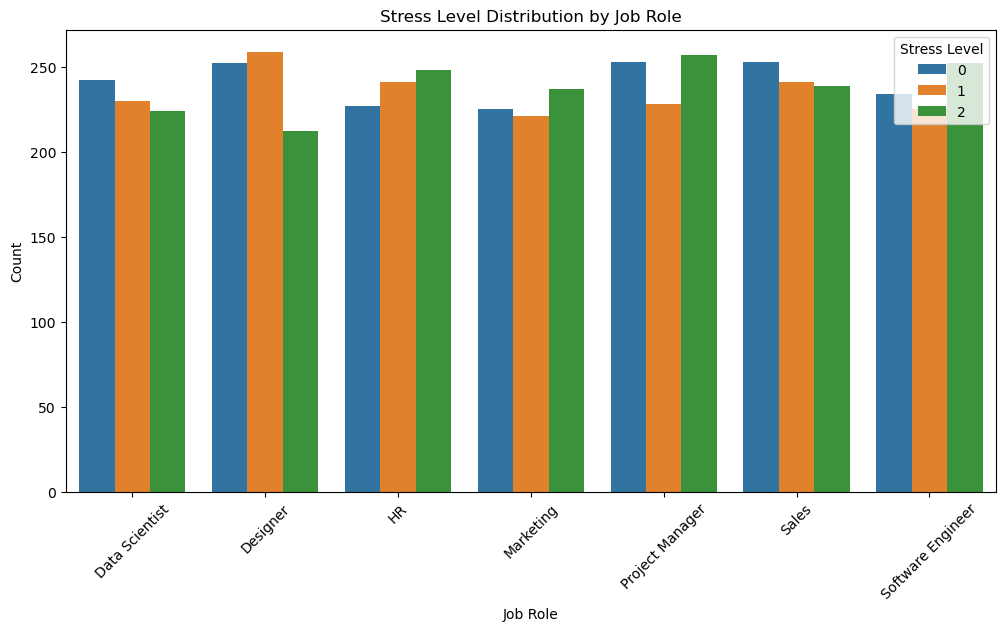

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Job_Role', hue='Stress_Level', data=df)
plt.title('Stress Level Distribution by Job Role')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Job Role')
plt.legend(title='Stress Level')
plt.show()

STATISTICAL ANALYSIS

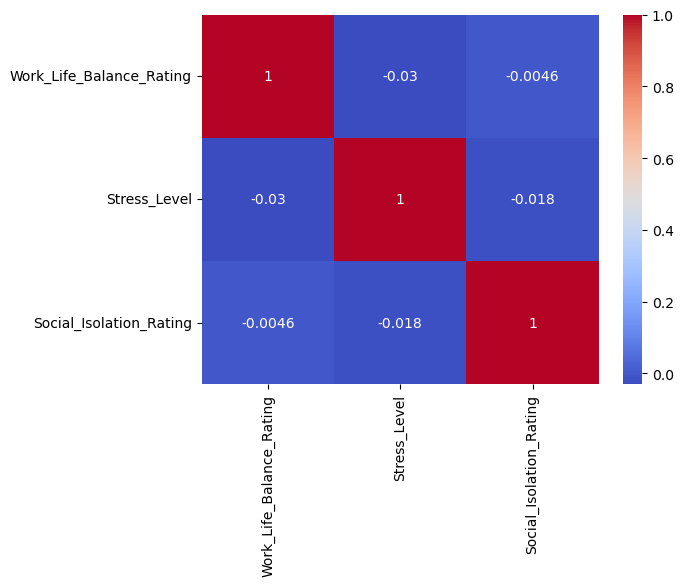

In [94]:
corr_matrix = df[['Work_Life_Balance_Rating', 'Stress_Level', 'Social_Isolation_Rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

HYPOTHESIS TESTING FOR JOBROLE AND STRESS LEVEL

In [108]:
anova_result = stats.f_oneway(df[df['Job_Role'] == 'HR']['Stress_Level'],
                              df[df['Job_Role'] == 'Marketing']['Stress_Level'],
                              df[df['Job_Role'] == 'Software Engineer']['Stress_Level'],
                              df[df['Job_Role'] == 'Designer']['Stress_Level'],
                              df[df['Job_Role'] == 'Sales']['Stress_Level'])

# Print the ANOVA result
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA result: F-statistic = 1.4093871677493075, p-value = 0.22814284733874624


HYPOTHESIS TESTING FOR AGE AND STRESS LEVEL

In [116]:
corr, p_value = pearsonr(df['Age'], df['Stress_Level'])

print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between Age and Stress Level.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between Age and Stress Level.")

Pearson Correlation Coefficient: -0.006443629095885104
P-value: 0.6487321687644537
Fail to reject the null hypothesis. There is no significant correlation between Age and Stress Level.


HYPOTHESIS TESTING FOR WORK LIFE BALANCE AND STRESS LEVEL

In [118]:
high_balance = df[df['Work_Life_Balance_Rating'] > 2.5]['Stress_Level']
low_balance = df[df['Work_Life_Balance_Rating'] <= 2.5]['Stress_Level']

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_balance, low_balance)

print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")

T-test result: t-statistic = -2.3204170897603595, p-value = 0.020358384769622803


test whether job roles or geographic regions significantly impact stress levels or productivity, using ANOVA.

In [119]:
f_val, p_val = stats.f_oneway(df[df['Job_Role'] == 'HR']['Stress_Level'],
                              df[df['Job_Role'] == 'Designer']['Stress_Level'],
                              df[df['Job_Role'] == 'Sales']['Stress_Level'])
print(f"ANOVA F-value: {f_val}, P-value: {p_val}")

ANOVA F-value: 1.9708670626150229, P-value: 0.13958543942182902


Chi-Square test for stress level by region

In [121]:
contingency_table = pd.crosstab(df['Stress_Level'], df['Region'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test P-value: {p}")

Chi-Square Test P-value: 0.4136957116930439


Hypothesis Testing for Access to Mental Health Resources and Stress Level

In [122]:
# Hypothesis Testing for Access to Mental Health Resources and Stress Level
high_resource = df[df['Access_to_Mental_Health_Resources'] == 'Yes']['Stress_Level']
low_resource = df[df['Access_to_Mental_Health_Resources'] == 'No']['Stress_Level']

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_resource, low_resource)

print(f"T-test result for Access to Mental Health Resources: t-statistic = {t_stat}, p-value = {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis. Access to mental health resources significantly affects stress levels.")
else:
    print("Fail to reject the null hypothesis. Access to mental health resources does not significantly affect stress levels.")


T-test result for Access to Mental Health Resources: t-statistic = -1.992495684756315, p-value = 0.04637099791435309
Reject the null hypothesis. Access to mental health resources significantly affects stress levels.


T-statistic: The negative t-statistic suggests that individuals with access to mental health resources generally report lower stress levels compared to those without access.
P-value: Since the p-value (0.046) is below the significance level (0.05), you can confidently conclude that there is a significant difference in stress levels based on access to mental health resources.

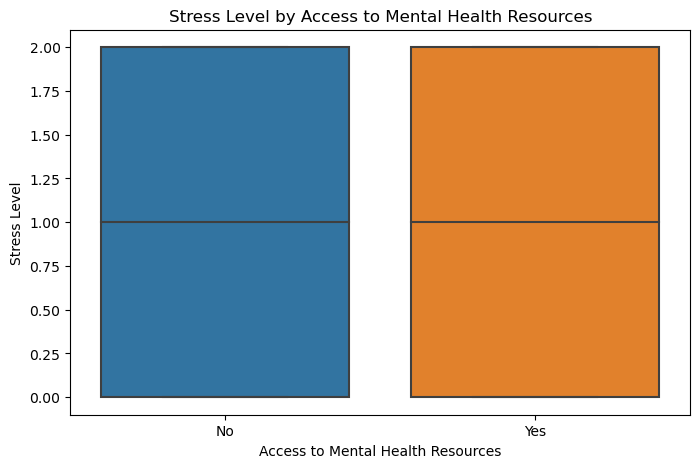

In [123]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Access_to_Mental_Health_Resources', y='Stress_Level', data=df)
plt.title('Stress Level by Access to Mental Health Resources')
plt.xlabel('Access to Mental Health Resources')
plt.ylabel('Stress Level')
plt.show()


In [124]:
df.to_csv('cleaned_dataset_remotework_productivity.csv', index=False)